In [1]:
import model_loader
import torch
import os
import numpy as np
from PIL import Image
import time
from matplotlib import pyplot as plt
import pandas as pd


deeplabv3 = pd.read_csv("inference time tests\deeplabv3.csv", names=["img_size", "time"], header=None)
deeplabv3plus_l = pd.read_csv("inference time tests\deeplabv3plus_l.csv", names=["img_size", "time"], header=None)
deeplabv3plus_s = pd.read_csv("inference time tests\deeplabv3plus_s.csv", names=["img_size", "time"], header=None)
pspnet18 = pd.read_csv("inference time tests\\pspnet18.csv", names=["img_size", "time"], header=None)
pspnet50 = pd.read_csv("inference time tests\\pspnet50.csv", names=["img_size", "time"], header=None)
unet = pd.read_csv("inference time tests\\unet.csv", names=["img_size", "time"], header=None)

c:\Users\Opina\AppData\Local\Programs\Python\Python311\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
model = model_loader.SegmentationModel("unetplusplus", 2)
sum((p.numel() for p in model.parameters())) / 1e6

15.964322

Text(0.5, 0, 'Image width and height')

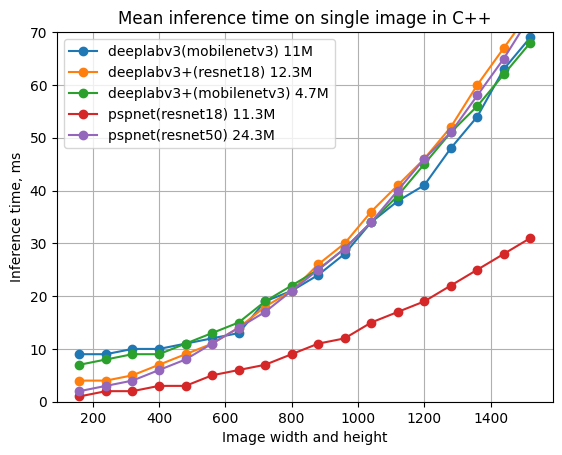

In [2]:
plt.plot(deeplabv3.img_size, deeplabv3.time, "o-", label="deeplabv3(mobilenetv3) 11M")
plt.plot(deeplabv3plus_l.img_size, deeplabv3plus_l.time, "o-", label="deeplabv3+(resnet18) 12.3M")
plt.plot(deeplabv3plus_s.img_size, deeplabv3plus_s.time, "o-", label="deeplabv3+(mobilenetv3) 4.7M")
plt.plot(pspnet18.img_size, pspnet18.time, "o-", label="pspnet(resnet18) 11.3M")
plt.plot(pspnet50.img_size, pspnet50.time, "o-", label="pspnet(resnet50) 24.3M")
plt.grid()
plt.legend()
plt.ylim((0, 70))
plt.title("Mean inference time on single image in C++")
plt.ylabel("Inference time, ms")
plt.xlabel("Image width and height")

<Axes: xlabel='name', ylabel='iou'>

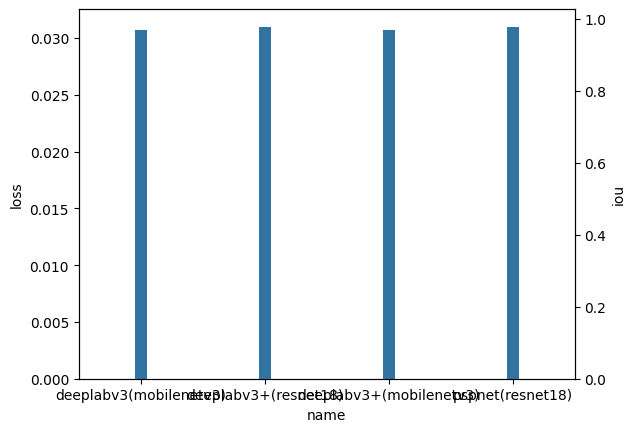

In [15]:
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
import pandas as pd

names = ["deeplabv3(mobilenetv3)", "deeplabv3+(resnet18)", "deeplabv3+(mobilenetv3)", "pspnet(resnet18)"]
losses = [0.0159, 0.0111, 0.0143, 0.031]
ious = [0.968, 0.9782, 0.97, 0.9491]
df = pd.DataFrame({"name": names, "loss": losses, "iou": ious})

fig, ax1 = plt.subplots()
ax2 = ax1.twinx()
sns.barplot(df, x="name", y="loss", width=0.1, ax=ax1)
sns.barplot(df, x="name", y="iou", width=0.1, ax=ax2)